# **Analyzing Amazon Sales data**

---



---

In [1]:
#Import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data_Analyst/Data_Analyst_Details/Analyzing_Amazon_Sales_data/Amazon Sales data.csv")

In [3]:
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
#check null values in dataset
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [6]:
#check unique value
df['Sales Channel'].unique()

array(['Offline', 'Online'], dtype=object)

In [7]:
#convert into numerical form
df['Sales Channel']= df['Sales Channel'].map({'Offline':0,'Online':1})

In [8]:
#sales channel convert into numerical form
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,0,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,1,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,0,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,1,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,0,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [10]:
df['Order Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

In [11]:
#df_new = pd.get_dummies(df, columns=["Order Priority"], drop_first=True)  #one hot encoding

In [12]:
#convert catogorical data into numerical
df['Order Priority']= df['Order Priority'].map({'H':1,'C':2,'L':3,'M':4})

In [13]:
#create date, month and year for order
df['Order_Month']=df['Order Date'].str.split('/').str[0]
df['Order_Date']=df['Order Date'].str.split('/').str[1]
df['Order_Year']=df['Order Date'].str.split('/').str[2]

In [14]:
#drop order date column from dataset
df.drop('Order Date',axis =1,inplace=True)

In [15]:
#change the data type
df['Order_Month']=df['Order_Month'].astype(int)
df['Order_Date']=df['Order_Date'].astype(int)
df['Order_Year']=df['Order_Year'].astype(int)

In [16]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Month,Order_Date,Order_Year
0,Australia and Oceania,Tuvalu,Baby Food,0,1,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,28,2010
1,Central America and the Caribbean,Grenada,Cereal,1,2,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,8,22,2012
2,Europe,Russia,Office Supplies,0,3,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,1,2,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,6,20,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,0,3,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,1,2013
5,Australia and Oceania,Solomon Islands,Baby Food,1,2,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64,2,4,2015
6,Sub-Saharan Africa,Angola,Household,0,4,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51,4,23,2011
7,Sub-Saharan Africa,Burkina Faso,Vegetables,1,1,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66,7,17,2012
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,0,4,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20,7,14,2015
9,Sub-Saharan Africa,Senegal,Cereal,1,1,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87,4,18,2014


In [17]:
#create date, month and year for shipping
df['Ship_Month']=df['Ship Date'].str.split('/').str[0]
df['Ship_Date']=df['Ship Date'].str.split('/').str[1]
df['Ship_Year']=df['Ship Date'].str.split('/').str[2]
#drop ship date column on dataset
df.drop('Ship Date',axis =1,inplace=True)
df['Ship_Month']=df['Ship_Month'].astype(int)
df['Ship_Date']=df['Ship_Date'].astype(int)
df['Ship_Year']=df['Ship_Year'].astype(int)

In [18]:
#Change data type
df['Ship_Month']=df['Ship_Month'].astype(int)
df['Ship_Date']=df['Ship_Date'].astype(int)
df['Ship_Year']=df['Ship_Year'].astype(int)

In [19]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Month,Order_Date,Order_Year,Ship_Month,Ship_Date,Ship_Year
0,Australia and Oceania,Tuvalu,Baby Food,0,1,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,28,2010,6,27,2010
1,Central America and the Caribbean,Grenada,Cereal,1,2,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36,8,22,2012,9,15,2012
2,Europe,Russia,Office Supplies,0,3,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2,2014,5,8,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,1,2,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82,6,20,2014,7,5,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,0,3,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,1,2013,2,6,2013
5,Australia and Oceania,Solomon Islands,Baby Food,1,2,547995746,2974,255.28,159.42,759202.72,474115.08,285087.64,2,4,2015,2,21,2015
6,Sub-Saharan Africa,Angola,Household,0,4,135425221,4187,668.27,502.54,2798046.49,2104134.98,693911.51,4,23,2011,4,27,2011
7,Sub-Saharan Africa,Burkina Faso,Vegetables,1,1,871543967,8082,154.06,90.93,1245112.92,734896.26,510216.66,7,17,2012,7,27,2012
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,0,4,770463311,6070,81.73,56.67,496101.10,343986.90,152114.20,7,14,2015,8,25,2015
9,Sub-Saharan Africa,Senegal,Cereal,1,1,616607081,6593,205.70,117.11,1356180.10,772106.23,584073.87,4,18,2014,5,30,2014


In [20]:
df.describe()

,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Month,Order_Date,Order_Year,Ship_Month,Ship_Date,Ship_Year
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.500000,2.390000,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,6.260000,16.500000,2013.230000,6.550000,16.450000,2013.270000
std,0.502519,1.127212,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,3.353334,8.997755,2.088231,3.502885,9.016679,2.054092
min,0.000000,1.000000,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,1.000000,1.000000,2010.000000,1.000000,1.000000,2010.000000
25%,0.000000,1.000000,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,4.000000,8.000000,2012.000000,3.000000,8.000000,2012.000000
50%,0.500000,2.000000,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,6.000000,17.000000,2013.000000,6.500000,17.000000,2013.000000
75%,1.000000,3.000000,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,9.250000,24.250000,2015.000000,10.000000,25.000000,2015.000000
max,1.000000,4.000000,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,12.000000,31.000000,2017.000000,12.000000,31.000000,2017.000000


In [68]:
df_cov=df.cov()

<ipython-input-68-8ae5fb741d53>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cov=df.cov()


In [69]:
df_cor = df.corr()

<ipython-input-69-58990a499b8b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cor = df.corr()


In [102]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [91]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
  return col_corr

In [118]:
corr_feature = correlation(numeric_data,0.2)

In [119]:
corr_feature

set()

In [105]:
numeric_data

,Sales_channel,Order_priority,Order_id,Unit_sold,Unit_price,Unit_cost,Total_revenue,Total_cost,Total_profit,Order_Month,Order_Date,Order_Year,Ship_Month,Ship_Date,Ship_Year
0,0,1,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,28,2010,6,27,2010
1,1,2,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36,8,22,2012,9,15,2012
2,0,3,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2,2014,5,8,2014
3,1,2,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82,6,20,2014,7,5,2014
4,0,3,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,1,2013,2,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,4,512878119,888,109.28,35.84,97040.64,31825.92,65214.72,7,26,2011,9,3,2011
96,0,3,810711038,6267,9.33,6.92,58471.11,43367.64,15103.47,11,11,2011,12,28,2011
97,0,2,728815257,1485,154.06,90.93,228779.10,135031.05,93748.05,6,1,2016,6,29,2016
98,0,4,559427106,5767,81.73,56.67,471336.91,326815.89,144521.02,7,30,2015,8,8,2015


<Axes: >

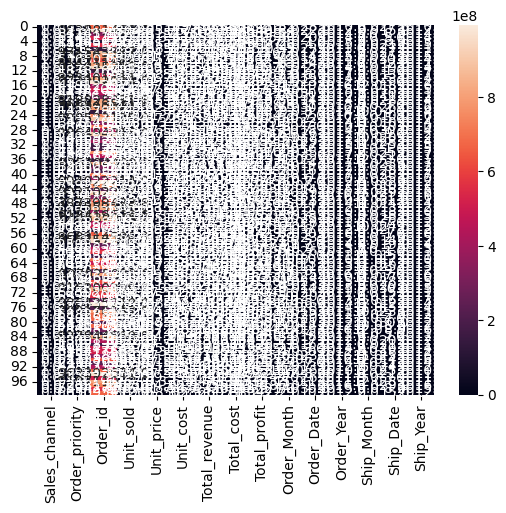

In [129]:
sns.heatmap(numeric_data,annot = True, fmt= '.1f')

ValueError: ignored

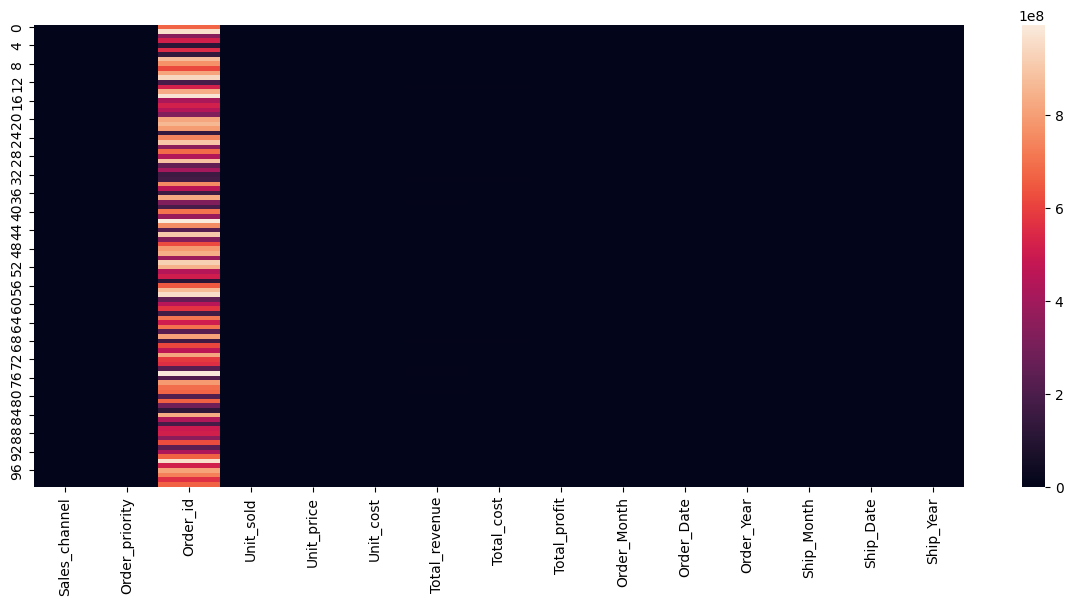

In [123]:
"fig = plt.gcf()
fig.set_size_inches(15,6)
sns.heatmap(numeric_data, annot = True,fmt = 'd');

In [23]:
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Month,Order_Date,Order_Year,Ship_Month,Ship_Date,Ship_Year
0,Australia and Oceania,Tuvalu,Baby Food,0,1,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,28,2010,6,27,2010
1,Central America and the Caribbean,Grenada,Cereal,1,2,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36,8,22,2012,9,15,2012
2,Europe,Russia,Office Supplies,0,3,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2,2014,5,8,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,1,2,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82,6,20,2014,7,5,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,0,3,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,1,2013,2,6,2013


Visualization

<Axes: xlabel='Order_Year', ylabel='Total Profit'>

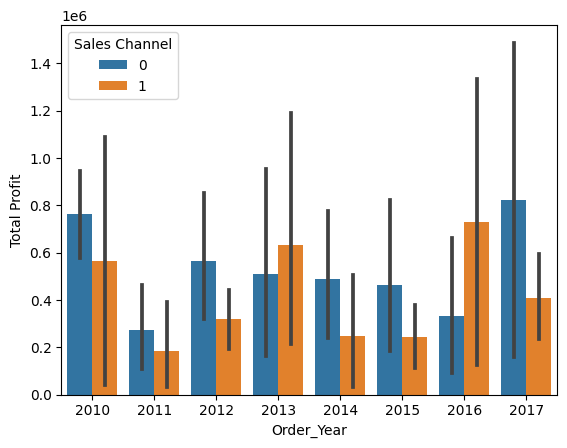

In [24]:
sns.barplot(x= 'Order_Year',y= 'Total Profit',hue = 'Sales Channel' ,data = df)  #Offline = 0, online = 1

<Axes: xlabel='Order_Year', ylabel='Units Sold'>

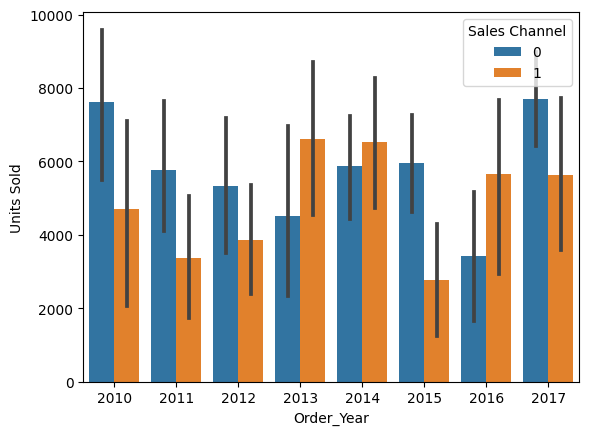

In [25]:
sns.barplot(x= 'Order_Year',y= 'Units Sold',hue = 'Sales Channel' ,data = df)  #Offline = 0, online = 1

In [26]:
df.columns


Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order ID', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue',
       'Total Cost', 'Total Profit', 'Order_Month', 'Order_Date', 'Order_Year',
       'Ship_Month', 'Ship_Date', 'Ship_Year'],
      dtype='object')

In [27]:
df = df.rename(mapper={'Item Type': 'Item_type', 'Sales Channel': 'Sales_channel', 'Order Priority': 'Order_priority','Order ID':'Order_id','Units Sold':'Unit_sold','Unit Price':'Unit_price','Unit Cost':'Unit_cost','Total Revenue':'Total_revenue','Total Cost':'Total_cost','Total Profit':'Total_profit'},
                axis=1)  # axis=1 corresponds to columns

In [28]:
df.head(4)

,Region,Country,Item_type,Sales_channel,Order_priority,Order_id,Unit_sold,Unit_price,Unit_cost,Total_revenue,Total_cost,Total_profit,Order_Month,Order_Date,Order_Year,Ship_Month,Ship_Date,Ship_Year
0,Australia and Oceania,Tuvalu,Baby Food,0,1,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,28,2010,6,27,2010
1,Central America and the Caribbean,Grenada,Cereal,1,2,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36,8,22,2012,9,15,2012
2,Europe,Russia,Office Supplies,0,3,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2,2014,5,8,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,1,2,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82,6,20,2014,7,5,2014


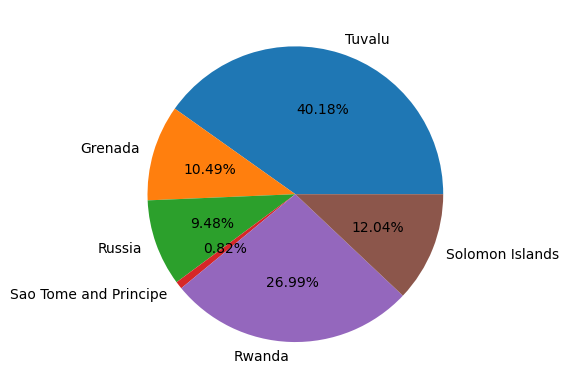

In [29]:
plt.pie(df.Total_profit[:6],labels = df.Country[:6], autopct = '%1.2f%%');

Observation: above top 6 company got top profit from amazon sales.but in Tuvalu having 40.18% percentage profit as compare to other counteries.

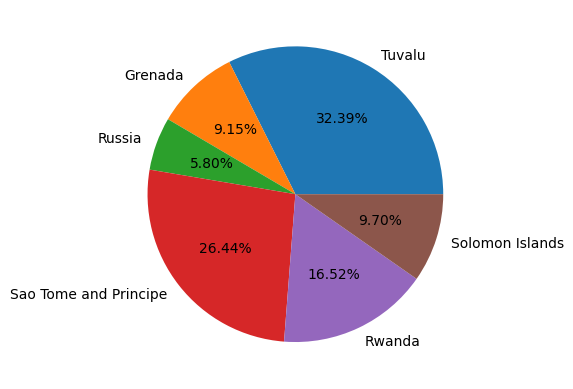

In [30]:
plt.pie(df.Unit_sold[:6],labels = df.Country[:6], autopct = '%1.2f%%');

Observation:

In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item_type       100 non-null    object 
 3   Sales_channel   100 non-null    int64  
 4   Order_priority  100 non-null    int64  
 5   Order_id        100 non-null    int64  
 6   Unit_sold       100 non-null    int64  
 7   Unit_price      100 non-null    float64
 8   Unit_cost       100 non-null    float64
 9   Total_revenue   100 non-null    float64
 10  Total_cost      100 non-null    float64
 11  Total_profit    100 non-null    float64
 12  Order_Month     100 non-null    int64  
 13  Order_Date      100 non-null    int64  
 14  Order_Year      100 non-null    int64  
 15  Ship_Month      100 non-null    int64  
 16  Ship_Date       100 non-null    int64  
 17  Ship_Year       100 non-null    int6

In [32]:
df1 = df.sort_values('Order_Month',ascending=True)

In [33]:
df1.head(10)

,Region,Country,Item_type,Sales_channel,Order_priority,Order_id,Unit_sold,Unit_price,Unit_cost,Total_revenue,Total_cost,Total_profit,Order_Month,Order_Date,Order_Year,Ship_Month,Ship_Date,Ship_Year
49,Sub-Saharan Africa,Mauritania,Office Supplies,0,2,837559306,1266,651.21,524.96,824431.86,664599.36,159832.50,1,11,2012,1,13,2012
86,Sub-Saharan Africa,Sao Tome and Principe,Beverages,0,2,180283772,8829,47.45,31.79,418936.05,280673.91,138262.14,1,16,2011,1,21,2011
83,Sub-Saharan Africa,Zambia,Snacks,1,3,122583663,4085,152.58,97.44,623289.30,398042.40,225246.90,1,4,2011,1,5,2011
58,Europe,United Kingdom,Household,1,3,955357205,282,668.27,502.54,188452.14,141716.28,46735.86,1,5,2012,2,14,2012
37,Sub-Saharan Africa,The Gambia,Meat,1,4,825304400,4767,421.89,364.69,2011149.63,1738477.23,272672.40,1,14,2017,1,23,2017
12,Asia,Bangladesh,Clothes,1,3,187310731,8263,109.28,35.84,902980.64,296145.92,606834.72,1,13,2017,3,1,2017
33,Asia,Myanmar,Household,0,1,177713572,8250,668.27,502.54,5513227.50,4145955.00,1367272.50,1,16,2015,3,1,2015
94,Central America and the Caribbean,Nicaragua,Beverages,0,2,963392674,8156,47.45,31.79,387002.20,259279.24,127722.96,2,8,2011,3,21,2011
87,Sub-Saharan Africa,The Gambia,Baby Food,0,4,494747245,5559,255.28,159.42,1419101.52,886215.78,532885.74,2,3,2014,3,20,2014
85,North America,Mexico,Personal Care,0,3,430915820,6422,81.73,56.67,524870.06,363934.74,160935.32,2,17,2012,3,20,2012


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14')])

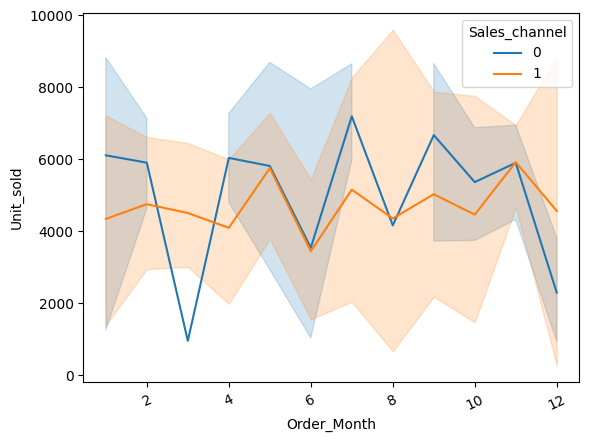

In [34]:
sns.lineplot(x = "Order_Month", y = "Unit_sold", hue = 'Sales_channel',
             data = df)

plt.xticks(rotation = 25)

(array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
        2018.]),
 [Text(2009.0, 0, '2009'),
  Text(2010.0, 0, '2010'),
  Text(2011.0, 0, '2011'),
  Text(2012.0, 0, '2012'),
  Text(2013.0, 0, '2013'),
  Text(2014.0, 0, '2014'),
  Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016'),
  Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018')])

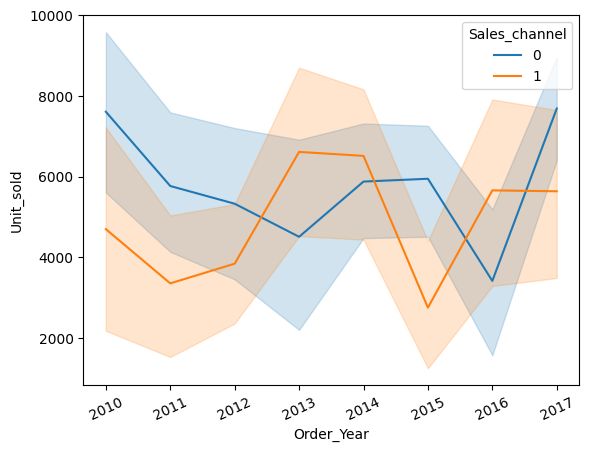

In [35]:
sns.lineplot(x = "Order_Year", y = "Unit_sold", hue = 'Sales_channel',
             data = df)

plt.xticks(rotation = 25)

In [36]:
df.columns

Index(['Region', 'Country', 'Item_type', 'Sales_channel', 'Order_priority',
       'Order_id', 'Unit_sold', 'Unit_price', 'Unit_cost', 'Total_revenue',
       'Total_cost', 'Total_profit', 'Order_Month', 'Order_Date', 'Order_Year',
       'Ship_Month', 'Ship_Date', 'Ship_Year'],
      dtype='object')

In [41]:
df_country=df.groupby(['Country', 'Item_type', 'Order_Year','Total_profit'])

In [44]:
df_country.size().head(15)

Country       Item_type        Order_Year  Total_profit
Albania       Clothes          2010        166635.36       1
Angola        Household        2011        693911.51       1
Australia     Beverages        2014        147031.74       1
              Cereal           2013        60418.38        1
              Office Supplies  2015        369155.00       1
Austria       Cosmetics        2015        495007.89       1
Azerbaijan    Cosmetics        2010        1257775.58      1
              Office Supplies  2012        255151.25       1
Bangladesh    Clothes          2017        606834.72       1
Belize        Clothes          2016        403773.12       1
Brunei        Office Supplies  2012        846885.00       1
Bulgaria      Clothes          2012        122865.12       1
              Office Supplies  2012        503358.75       1
Burkina Faso  Vegetables       2012        510216.66       1
Cameroon      Beverages        2015        85033.80        1
dtype: int64

<Axes: xlabel='Order_priority', ylabel='Total_profit'>

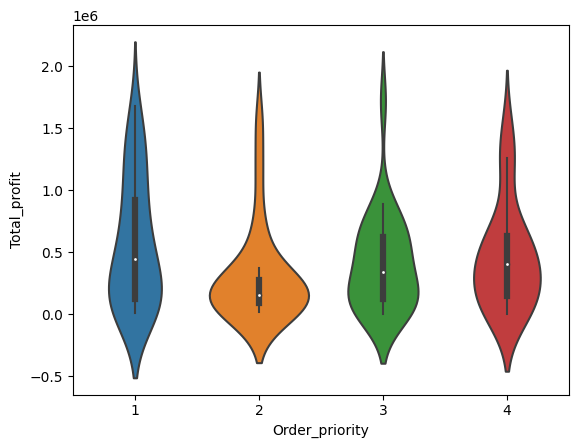

In [52]:
sns.violinplot(x = 'Order_priority', y = 'Total_profit', data = df)

<Axes: xlabel='Order_priority', ylabel='Order_Year'>

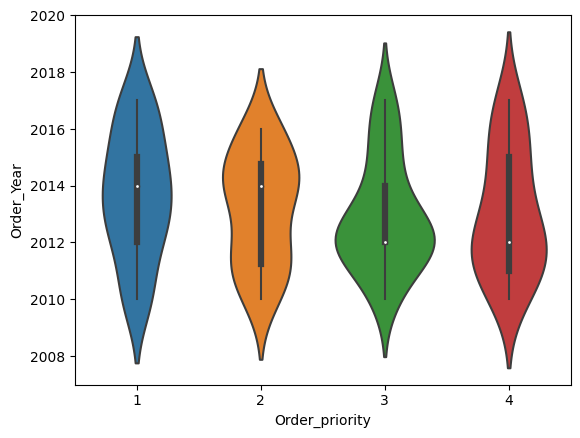

In [53]:
sns.violinplot(x = 'Order_priority', y = 'Order_Year', data = df)